## Ensemble Learning 

![Alt text](27473ensemble.png)


Ensemble learning is a technique in machine learning where multiple models are combined to improve the accuracy and robustness of the overall prediction. Instead of relying on a single model, ensemble learning uses a collection of models that work together to provide a more accurate prediction.  
  
There are different types of ensemble learning techniques, such as **bagging**, **boosting**, and **stacking**. In bagging, multiple models are trained independently on different subsets of the training data, and the final prediction is made by aggregating the predictions of all models. Boosting, on the other hand, trains models sequentially, with each model focusing on the samples that the previous model misclassified. Stacking is a more complex technique that combines multiple models using a meta-model, which learns to weigh the predictions of individual models based on their performance.  
  
Ensemble learning has been found to be very effective in improving the accuracy and stability of machine learning models, and it is widely used in many real-world applications, such as image classification, natural language processing, and financial forecasting.  


We would use penguin data to illustrate the method.
The dataset contain 8 variables: 
1. species: penguin species (Chinstrap, Adélie, or Gentoo)
2. culmen_length_mm: culmen length (mm)
3. culmen_depth_mm: culmen depth (mm)
4. flipper_length_mm: flipper length (mm)
5. body_mass_g: body mass (g)
6. island: island name (Dream, Torgersen, or Biscoe) in thePalmer. 
7. Archipelago (Antarctica) sex: penguin sex
8. The culmen is “the upper ridge of a bird’s beak”.

### Package

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline 

### Dataset

In [93]:
penguin = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/Ensemble-learning/penguins_size.csv')

penguin['sex'] = penguin['sex'].map({'MALE':1,'FEMALE':0})

penguin.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0


We notice there is a sex doesn't represent female nor male. We delete that for more clear analysis in the future. Also, we drop the NaN term. 

In [97]:
penguin_new = penguin.loc[penguin["sex"] != "."]
penguin_clean=penguin_new.dropna(how='any',axis=0)
penguin_clean


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0.0


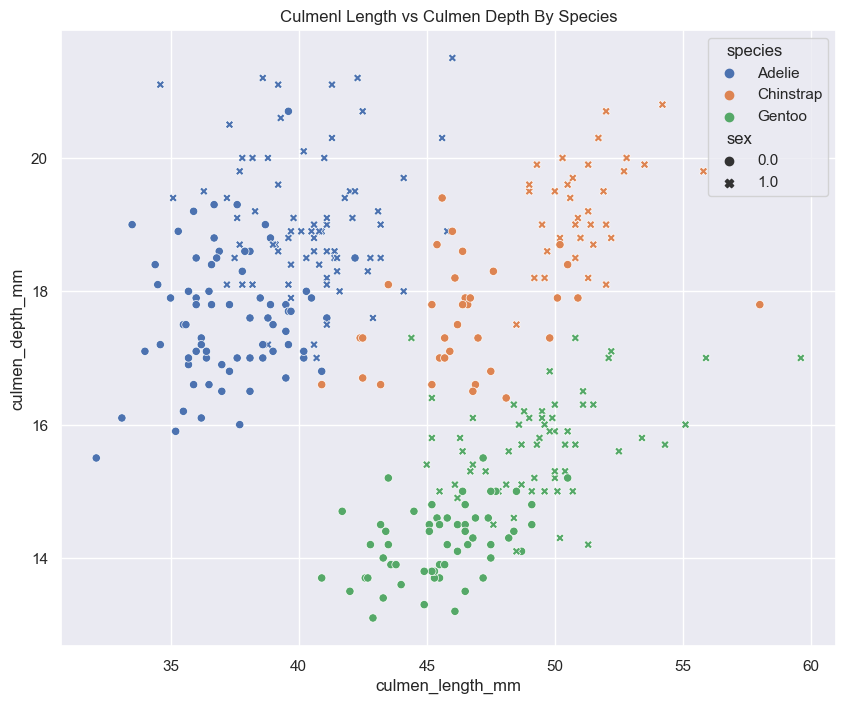

In [98]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "culmen_length_mm", y = "culmen_depth_mm", data = penguin_clean, hue = "species",style="sex")
plt.title("Culmenl Length vs Culmen Depth By Species")
plt.show()

<AxesSubplot:>

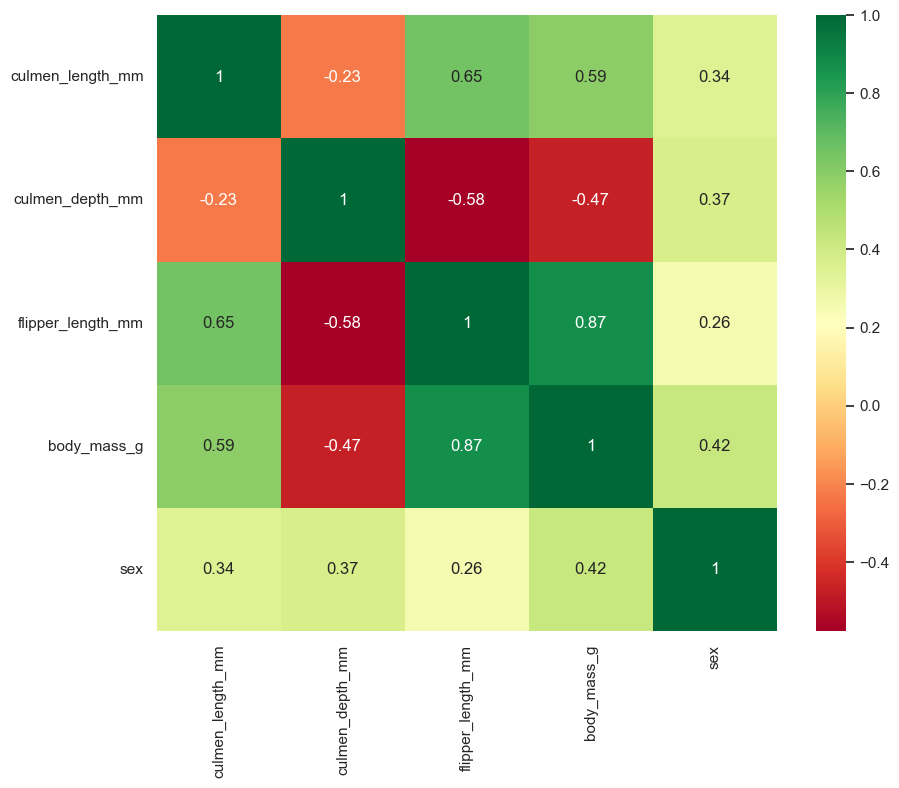

In [99]:
plt.figure(figsize = (10,8))
sns.heatmap(penguin_clean.corr(), annot = True, cmap='RdYlGn') 

### Random forest 

In [130]:
X = penguin_clean[["culmen_length_mm", "culmen_depth_mm"]].to_numpy()

y = penguin_clean["sex"].to_numpy()

We split the train and test dataset for applying svm,logistic, random forest and voting classifier and look for their accuracy. 

In [131]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.7611940298507462
logistic regression accuracy: 0.8208955223880597
random forest accuracy: 0.8507462686567164
voting classifier accuracy: 0.8283582089552238


From the result, we say the accuracy of random forest and voting classifier are close to each other and all has a high accuracy rate above 0.8. The highest ooccur in random forest, while svm has the loset score. 

### Bagging 

Bagging means the aggregating of bootstrap. In bagging, multiple models are trained on different subsets of the training data, and their predictions are combined to make the final prediction.   
![Alt text](bagging.png) 


In [132]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=600,
                         max_samples=100,
                         bootstrap=True,
                         n_jobs=-1)

In [133]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=600, n_jobs=-1)

In [134]:
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8283582089552238

The accuracy score for bagging is also high, but slightly slower than random forest. 

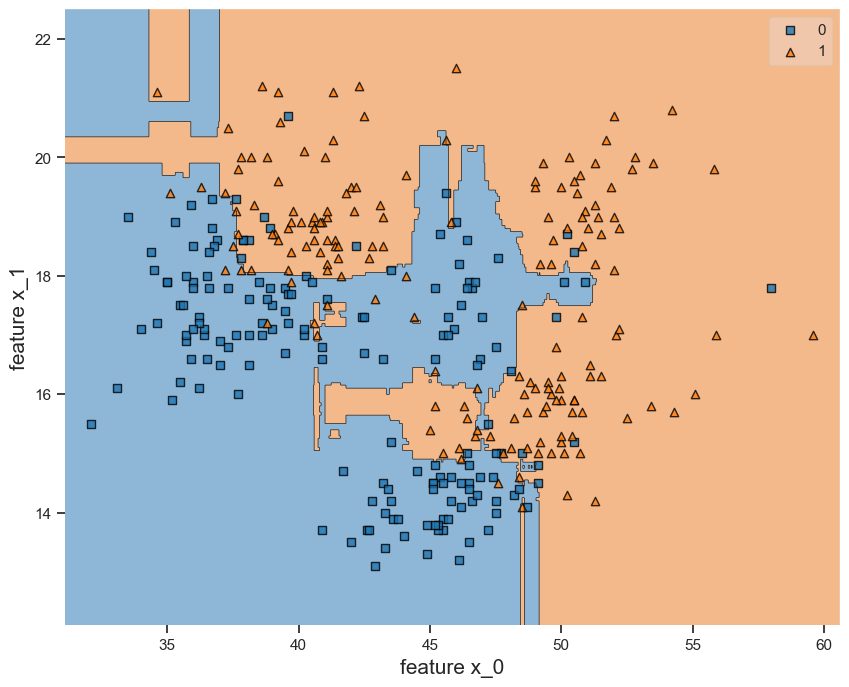

In [136]:
from mlxtend.plotting import plot_decision_regions
y = y.astype(int)
X = np.asarray(X)
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()